0.95
1095.8429611


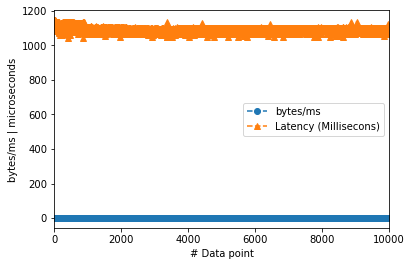

In [11]:
, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

f = open('results/1510670606_full_vector_encoder_1_0_8_134217728')

data = []

for line in f:
    temp = line.split(',')
    index = 0
    for item in temp: 
        temp[index] = parseData(index, item)
        index = index + 1
    data.append(temp)
    
        
    
    
throughput = []
latency = []

for entry in data: 
    throughput.append(entry[5])
    latency.append(entry[6])
latency = [lat/(1000) for lat in latency]
throughput = [th/(1000) for th in throughput] 
print(throughput[0])

avg_latency = 0.0
for val in latency:
    avg_latency = avg_latency + val
    
avg_latency = avg_latency / len(latency)
print avg_latency

#df = pd.DataFrame(data, columns=['a'])
#df.plot(kind='scatter', x='a')
pd.DataFrame
fig = plt.figure()
ts = pd.Series(throughput)
pd.to_numeric(ts)
throughput_line = ts.plot(label='test', marker='o', linestyle='--')

ts_2 = pd.Series(latency)
pd.to_numeric(ts_2)
latency_line  = ts_2.plot(marker='^', linestyle='--')
plt.legend(['bytes/ms', 'Latency (Millisecons)'])
plt.ylabel('bytes/ms | microseconds')
plt.xlabel('# Data point')
fig.savefig('results/graphs/full_vector_0_64_16.eps')
plt.show()

2147483648
[8192, 8388608, 83886080, 167772160, 268435456, 536870912, 1073741824, 2147483648, 4294967296]
534.278127


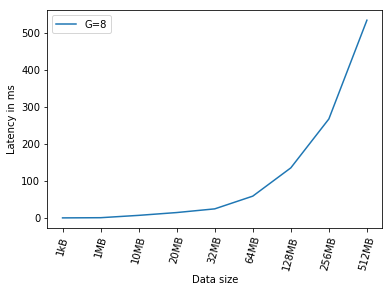

In [3]:
## Generation Size: 8 
## Full Vector - latency 
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def data_size_in_bytes(data_size, mb=True):
    kb = 1024
    if mb:
        return data_size * kb * kb
    else:
        return data_size * kb

def  calulate_theorectical(gen, data_size, redundancy=0):
    symbols = data_size / gen
    return symbols * gen * (gen + redundancy)

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds 
    return np.average(latency)

one_kb = 'results/encoder/thousand/1512452623_full_vector_encoder_binary8_0_8_128'
one_mb = 'results/encoder/thousand/1512452934_full_vector_encoder_binary8_0_8_131072'
ten_mb = 'results/encoder/thousand/1512453317_full_vector_encoder_binary8_0_8_1310720'
twenty_mb = 'results/encoder/thousand/1512453778_full_vector_encoder_binary8_0_8_2621440'
thirdy_two_mb = 'results/encoder/thousand/1512454344_full_vector_encoder_binary8_0_8_4194304'
sixty_four_mb = 'results/encoder/thousand/1512455182_full_vector_encoder_binary8_0_8_8388608'
one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512456573_full_vector_encoder_binary8_0_8_16777216'
two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512459046_full_vector_encoder_binary8_0_8_33554432'
five_hundre_and_twelve_mb = 'results/encoder/thousand/1512463692_full_vector_encoder_binary8_0_8_67108864'

latencies = {}

latencies[0] = get_latency(one_kb)
latencies[1] = get_latency(one_mb)
latencies[2] = get_latency(ten_mb)
latencies[3] = get_latency(twenty_mb)
latencies[4] = get_latency(thirdy_two_mb)
latencies[5] = get_latency(sixty_four_mb)
latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
latencies[8] = get_latency(five_hundre_and_twelve_mb)

theory = {}

print calulate_theorectical(8, data_size_in_bytes(256))
theory[0] = calulate_theorectical(8, data_size_in_bytes(1, False)) 
theory[1] = calulate_theorectical(8, data_size_in_bytes(1))
theory[2] = calulate_theorectical(8, data_size_in_bytes(10))
theory[3] = calulate_theorectical(8, data_size_in_bytes(20))
theory[4] = calulate_theorectical(8, data_size_in_bytes(32))
theory[5] = calulate_theorectical(8, data_size_in_bytes(64))
theory[6] = calulate_theorectical(8, data_size_in_bytes(128))
theory[7] = calulate_theorectical(8, data_size_in_bytes(256))
theory[8] = calulate_theorectical(8, data_size_in_bytes(512))

print theory.values()

data_size = np.array(latencies.keys())
latency = np.array(latencies.values())
print(latency[8])
theory = np.array(theory.values())
pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(data_size, my_xticks,rotation=75)

plt.plot(data_size, latency)
#plt.plot(data_size, theory)
plt.legend(['G=8', 'G=8(T)'])
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/full_vector_gen_8.eps')
plt.show()


2147483648
[8192, 8388608, 83886080, 167772160, 268435456, 536870912, 1073741824, 2147483648, 4294967296]
1036.495336


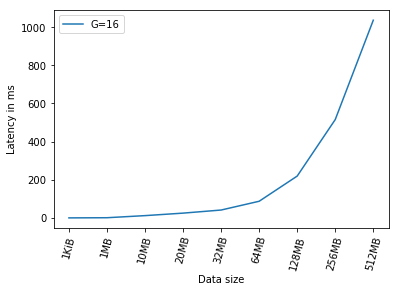

In [2]:
## Generation Size: 16
## Full Vector - latency 
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def data_size_in_bytes(data_size, mb=True):
    kb = 1024
    if mb:
        return data_size * kb * kb
    else:
        return data_size * kb

def  calulate_theorectical(gen, data_size, redundancy=0):
    symbols = data_size / gen
    return symbols * gen * (gen + redundancy)

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds 
    return np.average(latency)

five_hundre_and_twelve_mb = 'results/encoder/thousand/1512475943_full_vector_encoder_binary8_0_16_33554432'
two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512470804_full_vector_encoder_binary8_0_16_16777216'
one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512468085_full_vector_encoder_binary8_0_16_8388608'
sixty_four_mb = 'results/encoder/thousand/1512466613_full_vector_encoder_binary8_0_16_4194304'
thirdy_two_mb = 'results/encoder/thousand/1512465749_full_vector_encoder_binary8_0_16_2097152'
twenty_mb = 'results/encoder/thousand/1512465168_full_vector_encoder_binary8_0_16_1310720'
ten_mb = 'results/encoder/thousand/1512464696_full_vector_encoder_binary8_0_16_655360'
one_mb = 'results/encoder/thousand/1512464308_full_vector_encoder_binary8_0_16_65536'
one_kb = 'results/encoder/thousand/1512463997_full_vector_encoder_binary8_0_16_64'

latencies = {}

latencies[0] = get_latency(one_kb)
latencies[1] = get_latency(one_mb)
latencies[2] = get_latency(ten_mb)
latencies[3] = get_latency(twenty_mb)
latencies[4] = get_latency(thirdy_two_mb)
latencies[5] = get_latency(sixty_four_mb)
latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
latencies[8] = get_latency(five_hundre_and_twelve_mb)

theory = {}

print calulate_theorectical(8, data_size_in_bytes(256))
theory[0] = calulate_theorectical(8, data_size_in_bytes(1, False)) 
theory[1] = calulate_theorectical(8, data_size_in_bytes(1))
theory[2] = calulate_theorectical(8, data_size_in_bytes(10))
theory[3] = calulate_theorectical(8, data_size_in_bytes(20))
theory[4] = calulate_theorectical(8, data_size_in_bytes(32))
theory[5] = calulate_theorectical(8, data_size_in_bytes(64))
theory[6] = calulate_theorectical(8, data_size_in_bytes(128))
theory[7] = calulate_theorectical(8, data_size_in_bytes(256))
theory[8] = calulate_theorectical(8, data_size_in_bytes(512))

print theory.values()

data_size = np.array(latencies.keys())
latency = np.array(latencies.values())
theory = np.array(theory.values())
pd.DataFrame
fig = plt.figure()
my_xticks = ['1KiB','1MB', '10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(data_size, my_xticks,rotation=75)
plt.xticks(data_size, my_xticks)

plt.plot(data_size, latency)
#plt.plot(data_size, theory)
plt.legend(['G=16', 'G=16(T)'])
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/full_vector_gen_16.eps')
plt.show()




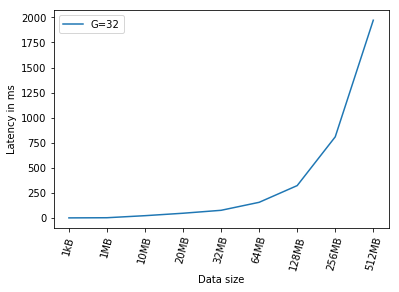

In [24]:
## Generation Size: 32 
## Full Vector - latency 
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds 
    return np.average(latency)

one_kb = 'results/encoder/thousand/1512476247_full_vector_encoder_binary8_0_32_32'
one_mb = 'results/encoder/thousand/1512476560_full_vector_encoder_binary8_0_32_32768'
ten_mb = 'results/encoder/thousand/1512476958_full_vector_encoder_binary8_0_32_327680'
twenty_mb = 'results/encoder/thousand/1512477451_full_vector_encoder_binary8_0_32_655360'
thirdy_two_mb = 'results/encoder/thousand/1512478066_full_vector_encoder_binary8_0_32_1048576'
sixty_four_mb = 'results/encoder/thousand/1512478997_full_vector_encoder_binary8_0_32_2097152'
one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512480568_full_vector_encoder_binary8_0_32_4194304'
two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512483577_full_vector_encoder_binary8_0_32_8388608'
five_hundre_and_twelve_mb = 'results/encoder/thousand/1512489653_full_vector_encoder_binary8_0_32_16777216'

latencies = {}

latencies[0] = get_latency(one_kb)
latencies[1] = get_latency(one_mb)
latencies[2] = get_latency(ten_mb)
latencies[3] = get_latency(twenty_mb)
latencies[4] = get_latency(thirdy_two_mb)
latencies[5] = get_latency(sixty_four_mb)
latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
latencies[8] = get_latency(five_hundre_and_twelve_mb)

data_size = np.array(latencies.keys())
latency = np.array(latencies.values())
pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(data_size, my_xticks,rotation=75)

plt.plot(data_size, latency)
plt.legend(['G=32'])
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/full_vector_gen_32.eps')
plt.show()


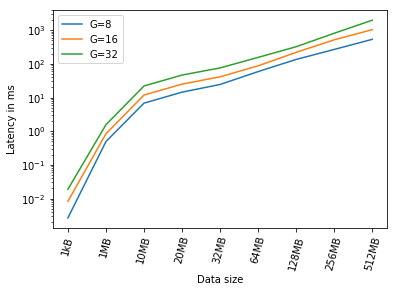

In [25]:
## Generation Size: 8,16,32 
## Full Vector - latency comparison
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds 
    return np.average(latency)

def read_gen_eight():
    one_kb = 'results/encoder/thousand/1512452623_full_vector_encoder_binary8_0_8_128'
    one_mb = 'results/encoder/thousand/1512452934_full_vector_encoder_binary8_0_8_131072'
    ten_mb = 'results/encoder/thousand/1512453317_full_vector_encoder_binary8_0_8_1310720'
    twenty_mb = 'results/encoder/thousand/1512453778_full_vector_encoder_binary8_0_8_2621440'
    thirdy_two_mb = 'results/encoder/thousand/1512454344_full_vector_encoder_binary8_0_8_4194304'
    sixty_four_mb = 'results/encoder/thousand/1512455182_full_vector_encoder_binary8_0_8_8388608'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512456573_full_vector_encoder_binary8_0_8_16777216'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512459046_full_vector_encoder_binary8_0_8_33554432'
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512463692_full_vector_encoder_binary8_0_8_67108864'

    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def read_gen_sixteen():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512475943_full_vector_encoder_binary8_0_16_33554432'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512470804_full_vector_encoder_binary8_0_16_16777216'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512468085_full_vector_encoder_binary8_0_16_8388608'
    sixty_four_mb = 'results/encoder/thousand/1512466613_full_vector_encoder_binary8_0_16_4194304'
    thirdy_two_mb = 'results/encoder/thousand/1512465749_full_vector_encoder_binary8_0_16_2097152'
    twenty_mb = 'results/encoder/thousand/1512465168_full_vector_encoder_binary8_0_16_1310720'
    ten_mb = 'results/encoder/thousand/1512464696_full_vector_encoder_binary8_0_16_655360'
    one_mb = 'results/encoder/thousand/1512464308_full_vector_encoder_binary8_0_16_65536'
    one_kb = 'results/encoder/thousand/1512463997_full_vector_encoder_binary8_0_16_64'
    
    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def read_gen_thirdy_two():
    one_kb = 'results/encoder/thousand/1512476247_full_vector_encoder_binary8_0_32_32'
    one_mb = 'results/encoder/thousand/1512476560_full_vector_encoder_binary8_0_32_32768'
    ten_mb = 'results/encoder/thousand/1512476958_full_vector_encoder_binary8_0_32_327680'
    twenty_mb = 'results/encoder/thousand/1512477451_full_vector_encoder_binary8_0_32_655360'
    thirdy_two_mb = 'results/encoder/thousand/1512478066_full_vector_encoder_binary8_0_32_1048576'
    sixty_four_mb = 'results/encoder/thousand/1512478997_full_vector_encoder_binary8_0_32_2097152'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512480568_full_vector_encoder_binary8_0_32_4194304'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512483577_full_vector_encoder_binary8_0_32_8388608'
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512489653_full_vector_encoder_binary8_0_32_16777216'

    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

eight_latencies = read_gen_eight()
eight_data_size = np.array(eight_latencies.keys())
eight_latency = np.array(eight_latencies.values())

sixteen_latencies = read_gen_sixteen()
sixteen_data_size = np.array(sixteen_latencies.keys())
sixteen_latency = np.array(sixteen_latencies.values())

thridy_two_latencies = read_gen_thirdy_two()
thridy_two_data_size = np.array(thridy_two_latencies.keys())
thridy_two_latency = np.array(thridy_two_latencies.values())


pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(data_size, my_xticks,rotation=75)

plt.plot(eight_data_size, eight_latency)

plt.xticks(sixteen_data_size, my_xticks)
plt.plot(sixteen_data_size, sixteen_latency)

plt.xticks(thridy_two_data_size, my_xticks)
plt.plot(thridy_two_data_size, thridy_two_latency)

plt.yscale("log", nonposy="clip")
plt.legend(['G=8', 'G=16', 'G=32'])
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/full_vector_gen_comparison.eps')
plt.show()

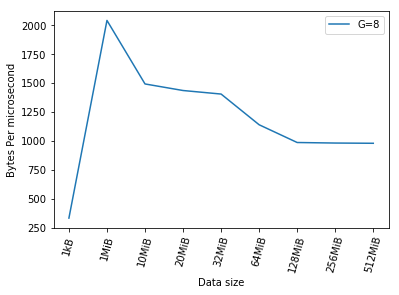

In [21]:
## Generation Size: 8 
## Full Vector - throughput 
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[5] for entry in data] # convert to milliseconds 
    return np.average(latency)
    
one_kb = 'results/1510751197_full_vector_encoder_1_0_8_128'
one_mb = 'results/1510751438_full_vector_encoder_1_0_8_131072'
ten_mb = 'results/1510752389_full_vector_encoder_1_0_8_1310720'
twenty_mb = 'results/1510822030_full_vector_encoder_1_0_8_2621440'
thirdy_two_mb = 'results/1510824925_full_vector_encoder_1_0_8_4194304'
sixty_four_mb = 'results/1510836357_full_vector_encoder_1_0_8_8388608'
one_hundre_and_twenty_eight_mb = 'results/1510847597_full_vector_encoder_1_0_8_16777216'
two_hundre_and_fifty_six_mb = 'results/1510927849_full_vector_encoder_1_0_8_33554432'
five_hundre_and_twelve_mb = 'results/1510972685_full_vector_encoder_1_0_8_67108864'

latencies = {}

latencies[0] = get_latency(one_kb)
latencies[1] = get_latency(one_mb)
latencies[2] = get_latency(ten_mb)
latencies[3] = get_latency(twenty_mb)
latencies[4] = get_latency(thirdy_two_mb)
latencies[5] = get_latency(sixty_four_mb)
latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
latencies[8] = get_latency(five_hundre_and_twelve_mb)

data_size = np.array(latencies.keys())
latency = np.array(latencies.values())
pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MiB','10MiB','20MiB','32MiB','64MiB','128MiB','256MiB','512MiB']
plt.xticks(data_size, my_xticks,rotation=75)
plt.plot(data_size, latency)
plt.legend(['G=8'])
plt.ylabel('Bytes Per microsecond')
plt.xlabel('Data size')
fig.savefig('results/graphs/full_vector_through_put_gen_8.eps')
plt.show()

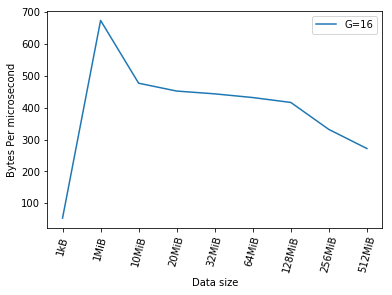

In [28]:
## Generation Size: 16 
## Full Vector - throughput 
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[5] for entry in data] # convert to milliseconds 
    return np.average(latency)
    
    five_hundre_and_twelve_mb = 'results/1511427894_full_vector_encoder_1_0_16_33554432'
    two_hundre_and_fifty_six_mb = 'results/1511454980_full_vector_encoder_1_0_16_16777216'
    one_hundre_and_twenty_eight_mb = 'results/1511470001_full_vector_encoder_1_0_16_8388608'
    sixty_four_mb = 'results/1511479334_full_vector_encoder_1_0_16_4194304'
    thirdy_two_mb = 'results/1511516065_full_vector_encoder_1_0_16_2097152'
    twenty_mb = 'results/1511524913_full_vector_encoder_1_0_16_1310720'
    ten_mb = 'results/1511529363_full_vector_encoder_1_0_16_655360'
    one_mb = 'results/1511534339_full_vector_encoder_1_0_16_65536'
    one_kb = 'results/1511534688_full_vector_encoder_1_0_16_64'

latencies = {}

latencies[0] = get_latency(one_kb)
latencies[1] = get_latency(one_mb)
latencies[2] = get_latency(ten_mb)
latencies[3] = get_latency(twenty_mb)
latencies[4] = get_latency(thirdy_two_mb)
latencies[5] = get_latency(sixty_four_mb)
latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
latencies[8] = get_latency(five_hundre_and_twelve_mb)

data_size = np.array(latencies.keys())
latency = np.array(latencies.values())
pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MiB','10MiB','20MiB','32MiB','64MiB','128MiB','256MiB','512MiB']
plt.xticks(data_size, my_xticks,rotation=75)
plt.plot(data_size, latency)
plt.legend(['G=16'])
plt.ylabel('Bytes Per microsecond')
plt.xlabel('Data size')
fig.savefig('results/graphs/full_vector_through_put_gen_16.eps')
plt.show()

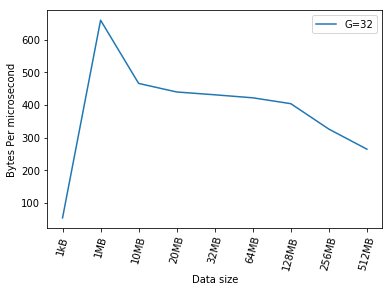

In [29]:
## Generation Size: 32 
## Full Vector - throughput 
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[5] for entry in data] # convert to milliseconds 
    return np.average(latency)
    
one_kb = 'results/1511252697_full_vector_encoder_1_0_32_32'
one_mb = 'results/1511252611_full_vector_encoder_1_0_32_32768'
ten_mb = 'results/1511252293_full_vector_encoder_1_0_32_327680'
twenty_mb = 'results/1511221602_full_vector_encoder_1_0_32_655360'
thirdy_two_mb = 'results/1511217072_full_vector_encoder_1_0_32_1048576'
sixty_four_mb = 'results/1511210497_full_vector_encoder_1_0_32_2097152'
one_hundre_and_twenty_eight_mb = 'results/1511201901_full_vector_encoder_1_0_32_4194304'
two_hundre_and_fifty_six_mb = 'results/1511187820_full_vector_encoder_1_0_32_8388608'
five_hundre_and_twelve_mb = 'results/1511156569_full_vector_encoder_1_0_32_16777216'

latencies = {}

latencies[0] = get_latency(one_kb)
latencies[1] = get_latency(one_mb)
latencies[2] = get_latency(ten_mb)
latencies[3] = get_latency(twenty_mb)
latencies[4] = get_latency(thirdy_two_mb)
latencies[5] = get_latency(sixty_four_mb)
latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
latencies[8] = get_latency(five_hundre_and_twelve_mb)

data_size = np.array(latencies.keys())
latency = np.array(latencies.values())
pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(data_size, my_xticks,rotation=75)
plt.plot(data_size, latency)
plt.legend(['G=32'])
plt.ylabel('Bytes Per microsecond')
plt.xlabel('Data size')
fig.savefig('results/graphs/full_vector_through_gen_32.eps')
plt.show()


336.3206
2043.096
1494.6857
1437.9984
1407.4016
1142.202
989.0439
984.4317
982.3868
126.422
1217.3281
858.5034
821.6987
800.3391
749.1728
603.6961
507.4595
506.3925
54.3936
660.137
466.4345
440.2093
431.6178
422.3622
404.3491
326.4833
264.8809


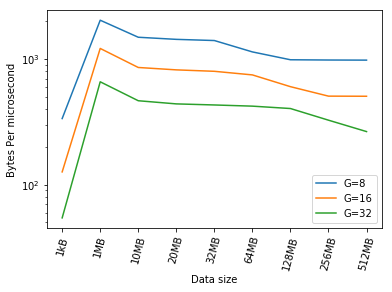

In [30]:
## Generation Size: 8,16,32 
## Full Vector - throughput comparison
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[5] for entry in data] # convert to milliseconds 
    print(np.average(latency))
    return np.average(latency)

def read_gen_eight():
    one_kb = 'results/1510751197_full_vector_encoder_1_0_8_128'
    one_mb = 'results/1510751438_full_vector_encoder_1_0_8_131072'
    ten_mb = 'results/1510752389_full_vector_encoder_1_0_8_1310720'
    twenty_mb = 'results/1510822030_full_vector_encoder_1_0_8_2621440'
    thirdy_two_mb = 'results/1510824925_full_vector_encoder_1_0_8_4194304'
    sixty_four_mb = 'results/1510836357_full_vector_encoder_1_0_8_8388608'
    one_hundre_and_twenty_eight_mb = 'results/1510847597_full_vector_encoder_1_0_8_16777216'
    two_hundre_and_fifty_six_mb = 'results/1510927849_full_vector_encoder_1_0_8_33554432'
    five_hundre_and_twelve_mb = 'results/1510972685_full_vector_encoder_1_0_8_67108864'

    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def read_gen_sixteen():
    five_hundre_and_twelve_mb = 'results/1511427894_full_vector_encoder_1_0_16_33554432'
    two_hundre_and_fifty_six_mb = 'results/1511454980_full_vector_encoder_1_0_16_16777216'
    one_hundre_and_twenty_eight_mb = 'results/1511470001_full_vector_encoder_1_0_16_8388608'
    sixty_four_mb = 'results/1511479334_full_vector_encoder_1_0_16_4194304'
    thirdy_two_mb = 'results/1511516065_full_vector_encoder_1_0_16_2097152'
    twenty_mb = 'results/1511524913_full_vector_encoder_1_0_16_1310720'
    ten_mb = 'results/1511529363_full_vector_encoder_1_0_16_655360'
    one_mb = 'results/1511534339_full_vector_encoder_1_0_16_65536'
    one_kb = 'results/1511534688_full_vector_encoder_1_0_16_64'
    
    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def read_gen_thirdy_two():
    one_kb = 'results/1511252697_full_vector_encoder_1_0_32_32'
    one_mb = 'results/1511252611_full_vector_encoder_1_0_32_32768'
    ten_mb = 'results/1511252293_full_vector_encoder_1_0_32_327680'
    twenty_mb = 'results/1511221602_full_vector_encoder_1_0_32_655360'
    thirdy_two_mb = 'results/1511217072_full_vector_encoder_1_0_32_1048576'
    sixty_four_mb = 'results/1511210497_full_vector_encoder_1_0_32_2097152'
    one_hundre_and_twenty_eight_mb = 'results/1511201901_full_vector_encoder_1_0_32_4194304'
    two_hundre_and_fifty_six_mb = 'results/1511187820_full_vector_encoder_1_0_32_8388608'
    five_hundre_and_twelve_mb = 'results/1511156569_full_vector_encoder_1_0_32_16777216'
    
    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

eight_latencies = read_gen_eight()
eight_data_size = np.array(eight_latencies.keys())
eight_latency = np.array(eight_latencies.values())

sixteen_latencies = read_gen_sixteen()
sixteen_data_size = np.array(sixteen_latencies.keys())
sixteen_latency = np.array(sixteen_latencies.values())

thridy_two_latencies = read_gen_thirdy_two()
thridy_two_data_size = np.array(thridy_two_latencies.keys())
thridy_two_latency = np.array(thridy_two_latencies.values())


pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(data_size, my_xticks,rotation=75)
plt.plot(eight_data_size, eight_latency)

plt.xticks(sixteen_data_size, my_xticks)
plt.plot(sixteen_data_size, sixteen_latency)

plt.xticks(thridy_two_data_size, my_xticks)
plt.plot(thridy_two_data_size, thridy_two_latency)

plt.yscale("log", nonposy="clip")
plt.legend(['G=8', 'G=16', 'G=32'])
plt.ylabel('Bytes Per microsecond')
plt.xlabel('Data size')
fig.savefig('results/graphs/full_vector_throughput_gen_comparison.eps')
plt.show()

2147483648
[8192, 8388608, 83886080, 167772160, 268435456, 536870912, 1073741824, 2147483648, 4294967296]


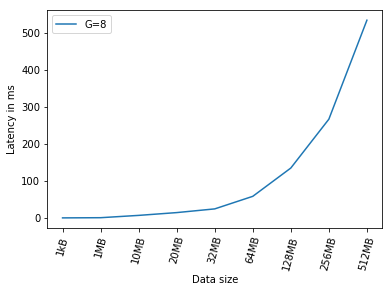

In [31]:
## Generation Size: 8 
## On The fly - latency 

import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def data_size_in_bytes(data_size, mb=True):
    kb = 1024
    if mb:
        return data_size * kb * kb
    else:
        return data_size * kb

def  calulate_theorectical(gen, data_size, redundancy=0):
    symbols = data_size / gen
    return symbols * gen * (gen + redundancy)

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds
    return np.average(latency)

five_hundre_and_twelve_mb = 'results/encoder/thousand/1512501259_on_the_fly_encoder_binary8_0_8_67108864'
two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512496496_on_the_fly_encoder_binary8_0_8_33554432'
one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512493964_on_the_fly_encoder_binary8_0_8_16777216'
sixty_four_mb = 'results/encoder/thousand/1512492545_on_the_fly_encoder_binary8_0_8_8388608'
thirdy_two_mb = 'results/encoder/thousand/1512491693_on_the_fly_encoder_binary8_0_8_4194304'
twenty_mb = 'results/encoder/thousand/1512491120_on_the_fly_encoder_binary8_0_8_2621440'
ten_mb = 'results/encoder/thousand/1512490653_on_the_fly_encoder_binary8_0_8_1310720'
one_mb = 'results/encoder/thousand/1512490269_on_the_fly_encoder_binary8_0_8_131072'
one_kb = 'results/encoder/thousand/1512489957_on_the_fly_encoder_binary8_0_8_128'

latencies = {}

latencies[0] = get_latency(one_kb)
latencies[1] = get_latency(one_mb)
latencies[2] = get_latency(ten_mb)
latencies[3] = get_latency(twenty_mb)
latencies[4] = get_latency(thirdy_two_mb)
latencies[5] = get_latency(sixty_four_mb)
latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
latencies[8] = get_latency(five_hundre_and_twelve_mb)

theory = {}

print calulate_theorectical(8, data_size_in_bytes(256))
theory[0] = calulate_theorectical(8, data_size_in_bytes(1, False)) 
theory[1] = calulate_theorectical(8, data_size_in_bytes(1))
theory[2] = calulate_theorectical(8, data_size_in_bytes(10))
theory[3] = calulate_theorectical(8, data_size_in_bytes(20))
theory[4] = calulate_theorectical(8, data_size_in_bytes(32))
theory[5] = calulate_theorectical(8, data_size_in_bytes(64))
theory[6] = calulate_theorectical(8, data_size_in_bytes(128))
theory[7] = calulate_theorectical(8, data_size_in_bytes(256))
theory[8] = calulate_theorectical(8, data_size_in_bytes(512))

print theory.values()

data_size = np.array(latencies.keys())
latency = np.array(latencies.values())
theory = np.array(theory.values())
pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(data_size, my_xticks,rotation=75)

plt.plot(data_size, latency)
#plt.plot(data_size, theory)
plt.legend(['G=8', 'G=8(T)'])
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/on_the_fly_gen_8.eps')
plt.show()



2147483648
[8192, 8388608, 83886080, 167772160, 268435456, 536870912, 1073741824, 2147483648, 4294967296]


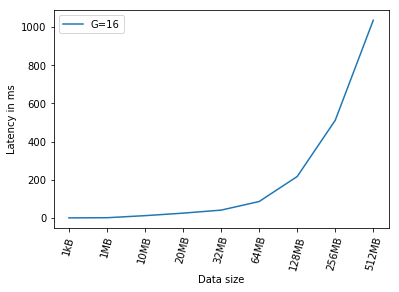

In [32]:
## Generation Size: 16 
## On The fly - latency 

import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def data_size_in_bytes(data_size, mb=True):
    kb = 1024
    if mb:
        return data_size * kb * kb
    else:
        return data_size * kb

def  calulate_theorectical(gen, data_size, redundancy=0):
    symbols = data_size / gen
    return symbols * gen * (gen + redundancy)

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds
    return np.average(latency)

five_hundre_and_twelve_mb = 'results/encoder/thousand/1512513739_on_the_fly_encoder_binary8_0_16_33554432'
two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512508485_on_the_fly_encoder_binary8_0_16_16777216'
one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512505713_on_the_fly_encoder_binary8_0_16_8388608'
sixty_four_mb = 'results/encoder/thousand/1512504214_on_the_fly_encoder_binary8_0_16_4194304'
thirdy_two_mb = 'results/encoder/thousand/1512503337_on_the_fly_encoder_binary8_0_16_2097152'
twenty_mb = 'results/encoder/thousand/1512502740_on_the_fly_encoder_binary8_0_16_1310720'
ten_mb = 'results/encoder/thousand/1512502264_on_the_fly_encoder_binary8_0_16_655360'
one_mb = 'results/encoder/thousand/1512501875_on_the_fly_encoder_binary8_0_16_65536'
one_kb = 'results/encoder/thousand/1512501563_on_the_fly_encoder_binary8_0_16_64'


latencies = {}

latencies[0] = get_latency(one_kb)
latencies[1] = get_latency(one_mb)
latencies[2] = get_latency(ten_mb)
latencies[3] = get_latency(twenty_mb)
latencies[4] = get_latency(thirdy_two_mb)
latencies[5] = get_latency(sixty_four_mb)
latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
latencies[8] = get_latency(five_hundre_and_twelve_mb)

theory = {}

print calulate_theorectical(8, data_size_in_bytes(256))
theory[0] = calulate_theorectical(8, data_size_in_bytes(1, False)) 
theory[1] = calulate_theorectical(8, data_size_in_bytes(1))
theory[2] = calulate_theorectical(8, data_size_in_bytes(10))
theory[3] = calulate_theorectical(8, data_size_in_bytes(20))
theory[4] = calulate_theorectical(8, data_size_in_bytes(32))
theory[5] = calulate_theorectical(8, data_size_in_bytes(64))
theory[6] = calulate_theorectical(8, data_size_in_bytes(128))
theory[7] = calulate_theorectical(8, data_size_in_bytes(256))
theory[8] = calulate_theorectical(8, data_size_in_bytes(512))

print theory.values()

data_size = np.array(latencies.keys())
latency = np.array(latencies.values())
theory = np.array(theory.values())
pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(data_size, my_xticks,rotation=75)

plt.plot(data_size, latency)
#plt.plot(data_size, theory)
plt.legend(['G=16', 'G=16(T)'])
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/on_the_fly_gen_16.eps')
plt.show()



2147483648
[8192, 8388608, 83886080, 167772160, 268435456, 536870912, 1073741824, 2147483648, 4294967296]


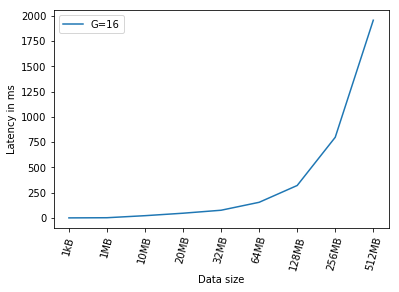

In [33]:
## Generation Size: 32 
## On The fly - latency 

import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def data_size_in_bytes(data_size, mb=True):
    kb = 1024
    if mb:
        return data_size * kb * kb
    else:
        return data_size * kb

def  calulate_theorectical(gen, data_size, redundancy=0):
    symbols = data_size / gen
    return symbols * gen * (gen + redundancy)

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds
    return np.average(latency)

five_hundre_and_twelve_mb = 'results/encoder/thousand/1512527656_on_the_fly_encoder_binary8_0_32_16777216'
two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512521487_on_the_fly_encoder_binary8_0_32_8388608'
one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512518431_on_the_fly_encoder_binary8_0_32_4194304'
sixty_four_mb = 'results/encoder/thousand/1512516828_on_the_fly_encoder_binary8_0_32_2097152'
thirdy_two_mb = 'results/encoder/thousand/1512515884_on_the_fly_encoder_binary8_0_32_1048576'
twenty_mb = 'results/encoder/thousand/1512515252_on_the_fly_encoder_binary8_0_32_655360'
ten_mb = 'results/encoder/thousand/1512514755_on_the_fly_encoder_binary8_0_32_327680'
one_mb = 'results/encoder/thousand/1512514356_on_the_fly_encoder_binary8_0_32_32768'
one_kb = 'results/encoder/thousand/1512514043_on_the_fly_encoder_binary8_0_32_32'


latencies = {}

latencies[0] = get_latency(one_kb)
latencies[1] = get_latency(one_mb)
latencies[2] = get_latency(ten_mb)
latencies[3] = get_latency(twenty_mb)
latencies[4] = get_latency(thirdy_two_mb)
latencies[5] = get_latency(sixty_four_mb)
latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
latencies[8] = get_latency(five_hundre_and_twelve_mb)

theory = {}

print calulate_theorectical(8, data_size_in_bytes(256))
theory[0] = calulate_theorectical(8, data_size_in_bytes(1, False)) 
theory[1] = calulate_theorectical(8, data_size_in_bytes(1))
theory[2] = calulate_theorectical(8, data_size_in_bytes(10))
theory[3] = calulate_theorectical(8, data_size_in_bytes(20))
theory[4] = calulate_theorectical(8, data_size_in_bytes(32))
theory[5] = calulate_theorectical(8, data_size_in_bytes(64))
theory[6] = calulate_theorectical(8, data_size_in_bytes(128))
theory[7] = calulate_theorectical(8, data_size_in_bytes(256))
theory[8] = calulate_theorectical(8, data_size_in_bytes(512))

print theory.values()

data_size = np.array(latencies.keys())
latency = np.array(latencies.values())
theory = np.array(theory.values())
pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(data_size, my_xticks,rotation=75)

plt.plot(data_size, latency)
#plt.plot(data_size, theory)
plt.legend(['G=16', 'G=16(T)'])
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/on_the_fly_gen_32.eps')
plt.show()



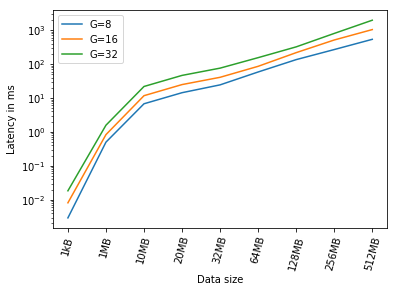

In [34]:
## Generation Size: 8,16,32 
## On The Fly - latency comparison
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds 
    return np.average(latency)

def read_gen_eight():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512501259_on_the_fly_encoder_binary8_0_8_67108864'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512496496_on_the_fly_encoder_binary8_0_8_33554432'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512493964_on_the_fly_encoder_binary8_0_8_16777216'
    sixty_four_mb = 'results/encoder/thousand/1512492545_on_the_fly_encoder_binary8_0_8_8388608'
    thirdy_two_mb = 'results/encoder/thousand/1512491693_on_the_fly_encoder_binary8_0_8_4194304'
    twenty_mb = 'results/encoder/thousand/1512491120_on_the_fly_encoder_binary8_0_8_2621440'
    ten_mb = 'results/encoder/thousand/1512490653_on_the_fly_encoder_binary8_0_8_1310720'
    one_mb = 'results/encoder/thousand/1512490269_on_the_fly_encoder_binary8_0_8_131072'
    one_kb = 'results/encoder/thousand/1512489957_on_the_fly_encoder_binary8_0_8_128'


    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def read_gen_sixteen():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512513739_on_the_fly_encoder_binary8_0_16_33554432'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512508485_on_the_fly_encoder_binary8_0_16_16777216'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512505713_on_the_fly_encoder_binary8_0_16_8388608'
    sixty_four_mb = 'results/encoder/thousand/1512504214_on_the_fly_encoder_binary8_0_16_4194304'
    thirdy_two_mb = 'results/encoder/thousand/1512503337_on_the_fly_encoder_binary8_0_16_2097152'
    twenty_mb = 'results/encoder/thousand/1512502740_on_the_fly_encoder_binary8_0_16_1310720'
    ten_mb = 'results/encoder/thousand/1512502264_on_the_fly_encoder_binary8_0_16_655360'
    one_mb = 'results/encoder/thousand/1512501875_on_the_fly_encoder_binary8_0_16_65536'
    one_kb = 'results/encoder/thousand/1512501563_on_the_fly_encoder_binary8_0_16_64'
    
    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def read_gen_thirdy_two():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512527656_on_the_fly_encoder_binary8_0_32_16777216'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512521487_on_the_fly_encoder_binary8_0_32_8388608'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512518431_on_the_fly_encoder_binary8_0_32_4194304'
    sixty_four_mb = 'results/encoder/thousand/1512516828_on_the_fly_encoder_binary8_0_32_2097152'
    thirdy_two_mb = 'results/encoder/thousand/1512515884_on_the_fly_encoder_binary8_0_32_1048576'
    twenty_mb = 'results/encoder/thousand/1512515252_on_the_fly_encoder_binary8_0_32_655360'
    ten_mb = 'results/encoder/thousand/1512514755_on_the_fly_encoder_binary8_0_32_327680'
    one_mb = 'results/encoder/thousand/1512514356_on_the_fly_encoder_binary8_0_32_32768'
    one_kb = 'results/encoder/thousand/1512514043_on_the_fly_encoder_binary8_0_32_32'

    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

eight_latencies = read_gen_eight()
eight_data_size = np.array(eight_latencies.keys())
eight_latency = np.array(eight_latencies.values())

sixteen_latencies = read_gen_sixteen()
sixteen_data_size = np.array(sixteen_latencies.keys())
sixteen_latency = np.array(sixteen_latencies.values())

thridy_two_latencies = read_gen_thirdy_two()
thridy_two_data_size = np.array(thridy_two_latencies.keys())
thridy_two_latency = np.array(thridy_two_latencies.values())


pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(eight_data_size, my_xticks, rotation=75)
plt.plot(eight_data_size, eight_latency)

plt.xticks(sixteen_data_size, my_xticks)
plt.plot(sixteen_data_size, sixteen_latency)

plt.xticks(thridy_two_data_size, my_xticks)
plt.plot(thridy_two_data_size, thridy_two_latency)

plt.yscale("log", nonposy="clip")
plt.legend(['G=8', 'G=16', 'G=32'])
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/on_the_fly_gen_comparison.eps')
plt.show()

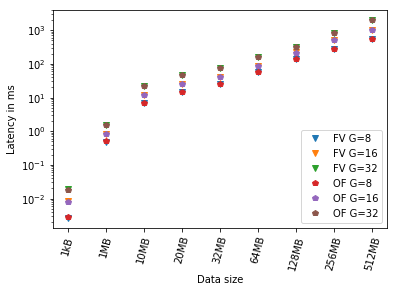

In [35]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds 
    return np.average(latency)

def fv_read_gen_eight():
    one_kb = 'results/encoder/thousand/1512452623_full_vector_encoder_binary8_0_8_128'
    one_mb = 'results/encoder/thousand/1512452934_full_vector_encoder_binary8_0_8_131072'
    ten_mb = 'results/encoder/thousand/1512453317_full_vector_encoder_binary8_0_8_1310720'
    twenty_mb = 'results/encoder/thousand/1512453778_full_vector_encoder_binary8_0_8_2621440'
    thirdy_two_mb = 'results/encoder/thousand/1512454344_full_vector_encoder_binary8_0_8_4194304'
    sixty_four_mb = 'results/encoder/thousand/1512455182_full_vector_encoder_binary8_0_8_8388608'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512456573_full_vector_encoder_binary8_0_8_16777216'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512459046_full_vector_encoder_binary8_0_8_33554432'
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512463692_full_vector_encoder_binary8_0_8_67108864'

    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def fv_read_gen_sixteen():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512475943_full_vector_encoder_binary8_0_16_33554432'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512470804_full_vector_encoder_binary8_0_16_16777216'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512468085_full_vector_encoder_binary8_0_16_8388608'
    sixty_four_mb = 'results/encoder/thousand/1512466613_full_vector_encoder_binary8_0_16_4194304'
    thirdy_two_mb = 'results/encoder/thousand/1512465749_full_vector_encoder_binary8_0_16_2097152'
    twenty_mb = 'results/encoder/thousand/1512465168_full_vector_encoder_binary8_0_16_1310720'
    ten_mb = 'results/encoder/thousand/1512464696_full_vector_encoder_binary8_0_16_655360'
    one_mb = 'results/encoder/thousand/1512464308_full_vector_encoder_binary8_0_16_65536'
    one_kb = 'results/encoder/thousand/1512463997_full_vector_encoder_binary8_0_16_64'
    
    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def fv_read_gen_thirdy_two():
    one_kb = 'results/encoder/thousand/1512476247_full_vector_encoder_binary8_0_32_32'
    one_mb = 'results/encoder/thousand/1512476560_full_vector_encoder_binary8_0_32_32768'
    ten_mb = 'results/encoder/thousand/1512476958_full_vector_encoder_binary8_0_32_327680'
    twenty_mb = 'results/encoder/thousand/1512477451_full_vector_encoder_binary8_0_32_655360'
    thirdy_two_mb = 'results/encoder/thousand/1512478066_full_vector_encoder_binary8_0_32_1048576'
    sixty_four_mb = 'results/encoder/thousand/1512478997_full_vector_encoder_binary8_0_32_2097152'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512480568_full_vector_encoder_binary8_0_32_4194304'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512483577_full_vector_encoder_binary8_0_32_8388608'
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512489653_full_vector_encoder_binary8_0_32_16777216'

    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def of_read_gen_eight():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512501259_on_the_fly_encoder_binary8_0_8_67108864'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512496496_on_the_fly_encoder_binary8_0_8_33554432'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512493964_on_the_fly_encoder_binary8_0_8_16777216'
    sixty_four_mb = 'results/encoder/thousand/1512492545_on_the_fly_encoder_binary8_0_8_8388608'
    thirdy_two_mb = 'results/encoder/thousand/1512491693_on_the_fly_encoder_binary8_0_8_4194304'
    twenty_mb = 'results/encoder/thousand/1512491120_on_the_fly_encoder_binary8_0_8_2621440'
    ten_mb = 'results/encoder/thousand/1512490653_on_the_fly_encoder_binary8_0_8_1310720'
    one_mb = 'results/encoder/thousand/1512490269_on_the_fly_encoder_binary8_0_8_131072'
    one_kb = 'results/encoder/thousand/1512489957_on_the_fly_encoder_binary8_0_8_128'


    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def of_read_gen_sixteen():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512513739_on_the_fly_encoder_binary8_0_16_33554432'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512508485_on_the_fly_encoder_binary8_0_16_16777216'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512505713_on_the_fly_encoder_binary8_0_16_8388608'
    sixty_four_mb = 'results/encoder/thousand/1512504214_on_the_fly_encoder_binary8_0_16_4194304'
    thirdy_two_mb = 'results/encoder/thousand/1512503337_on_the_fly_encoder_binary8_0_16_2097152'
    twenty_mb = 'results/encoder/thousand/1512502740_on_the_fly_encoder_binary8_0_16_1310720'
    ten_mb = 'results/encoder/thousand/1512502264_on_the_fly_encoder_binary8_0_16_655360'
    one_mb = 'results/encoder/thousand/1512501875_on_the_fly_encoder_binary8_0_16_65536'
    one_kb = 'results/encoder/thousand/1512501563_on_the_fly_encoder_binary8_0_16_64'
    
    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def of_read_gen_thirdy_two():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512527656_on_the_fly_encoder_binary8_0_32_16777216'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512521487_on_the_fly_encoder_binary8_0_32_8388608'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512518431_on_the_fly_encoder_binary8_0_32_4194304'
    sixty_four_mb = 'results/encoder/thousand/1512516828_on_the_fly_encoder_binary8_0_32_2097152'
    thirdy_two_mb = 'results/encoder/thousand/1512515884_on_the_fly_encoder_binary8_0_32_1048576'
    twenty_mb = 'results/encoder/thousand/1512515252_on_the_fly_encoder_binary8_0_32_655360'
    ten_mb = 'results/encoder/thousand/1512514755_on_the_fly_encoder_binary8_0_32_327680'
    one_mb = 'results/encoder/thousand/1512514356_on_the_fly_encoder_binary8_0_32_32768'
    one_kb = 'results/encoder/thousand/1512514043_on_the_fly_encoder_binary8_0_32_32'

    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies


fv_eight_latencies = fv_read_gen_eight()
fv_eight_data_size = np.array(fv_eight_latencies.keys())
fv_eight_latency = np.array(fv_eight_latencies.values())

fv_sixteen_latencies = fv_read_gen_sixteen()
fv_sixteen_data_size = np.array(fv_sixteen_latencies.keys())
fv_sixteen_latency = np.array(fv_sixteen_latencies.values())

fv_thridy_two_latencies = fv_read_gen_thirdy_two()
fv_thridy_two_data_size = np.array(fv_thridy_two_latencies.keys())
fv_thridy_two_latency = np.array(fv_thridy_two_latencies.values())

of_eight_latencies = of_read_gen_eight()
of_eight_data_size = np.array(of_eight_latencies.keys())
of_eight_latency = np.array(of_eight_latencies.values())

of_sixteen_latencies = of_read_gen_sixteen()
of_sixteen_data_size = np.array(of_sixteen_latencies.keys())
of_sixteen_latency = np.array(of_sixteen_latencies.values())

of_thridy_two_latencies = of_read_gen_thirdy_two()
of_thridy_two_data_size = np.array(of_thridy_two_latencies.keys())
of_thridy_two_latency = np.array(of_thridy_two_latencies.values())


pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']

plt.xticks(fv_eight_data_size, my_xticks, rotation=75)
plt.plot(fv_eight_data_size, fv_eight_latency, marker='v', linestyle='')

plt.xticks(fv_sixteen_data_size, my_xticks)
plt.plot(fv_sixteen_data_size, fv_sixteen_latency, marker='v', linestyle='')

plt.xticks(fv_thridy_two_data_size, my_xticks)
plt.plot(fv_thridy_two_data_size, fv_thridy_two_latency, marker='v', linestyle='')

plt.xticks(of_eight_data_size, my_xticks)
plt.plot(of_eight_data_size, of_eight_latency, marker='p', linestyle='')

plt.xticks(of_sixteen_data_size, my_xticks)
plt.plot(of_sixteen_data_size, of_sixteen_latency, marker='p', linestyle='')

plt.xticks(of_thridy_two_data_size, my_xticks)
plt.plot(of_thridy_two_data_size, of_thridy_two_latency, marker='p', linestyle='')

plt.yscale("log", nonposy="clip")
plt.legend(['FV G=8', 'FV G=16', 'FV G=32', 'OF G=8', 'OF G=16', 'OF G=32'])
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/fv_ov_comparison.eps')
plt.show()


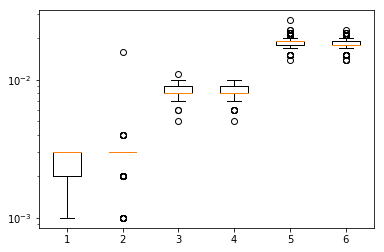

In [21]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    data = [entry[6]/1000 for entry in data] # convert to milliseconds 
    return data

def fv_read_gen_eight():
    one_kb = 'results/encoder/thousand/1512452623_full_vector_encoder_binary8_0_8_128'
    one_mb = 'results/encoder/thousand/1512452934_full_vector_encoder_binary8_0_8_131072'
    ten_mb = 'results/encoder/thousand/1512453317_full_vector_encoder_binary8_0_8_1310720'
    twenty_mb = 'results/encoder/thousand/1512453778_full_vector_encoder_binary8_0_8_2621440'
    thirdy_two_mb = 'results/encoder/thousand/1512454344_full_vector_encoder_binary8_0_8_4194304'
    sixty_four_mb = 'results/encoder/thousand/1512455182_full_vector_encoder_binary8_0_8_8388608'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512456573_full_vector_encoder_binary8_0_8_16777216'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512459046_full_vector_encoder_binary8_0_8_33554432'
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512463692_full_vector_encoder_binary8_0_8_67108864'

    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def fv_read_gen_sixteen():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512475943_full_vector_encoder_binary8_0_16_33554432'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512470804_full_vector_encoder_binary8_0_16_16777216'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512468085_full_vector_encoder_binary8_0_16_8388608'
    sixty_four_mb = 'results/encoder/thousand/1512466613_full_vector_encoder_binary8_0_16_4194304'
    thirdy_two_mb = 'results/encoder/thousand/1512465749_full_vector_encoder_binary8_0_16_2097152'
    twenty_mb = 'results/encoder/thousand/1512465168_full_vector_encoder_binary8_0_16_1310720'
    ten_mb = 'results/encoder/thousand/1512464696_full_vector_encoder_binary8_0_16_655360'
    one_mb = 'results/encoder/thousand/1512464308_full_vector_encoder_binary8_0_16_65536'
    one_kb = 'results/encoder/thousand/1512463997_full_vector_encoder_binary8_0_16_64'
    
    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def fv_read_gen_thirdy_two():
    one_kb = 'results/encoder/thousand/1512476247_full_vector_encoder_binary8_0_32_32'
    one_mb = 'results/encoder/thousand/1512476560_full_vector_encoder_binary8_0_32_32768'
    ten_mb = 'results/encoder/thousand/1512476958_full_vector_encoder_binary8_0_32_327680'
    twenty_mb = 'results/encoder/thousand/1512477451_full_vector_encoder_binary8_0_32_655360'
    thirdy_two_mb = 'results/encoder/thousand/1512478066_full_vector_encoder_binary8_0_32_1048576'
    sixty_four_mb = 'results/encoder/thousand/1512478997_full_vector_encoder_binary8_0_32_2097152'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512480568_full_vector_encoder_binary8_0_32_4194304'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512483577_full_vector_encoder_binary8_0_32_8388608'
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512489653_full_vector_encoder_binary8_0_32_16777216'

    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def of_read_gen_eight():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512501259_on_the_fly_encoder_binary8_0_8_67108864'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512496496_on_the_fly_encoder_binary8_0_8_33554432'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512493964_on_the_fly_encoder_binary8_0_8_16777216'
    sixty_four_mb = 'results/encoder/thousand/1512492545_on_the_fly_encoder_binary8_0_8_8388608'
    thirdy_two_mb = 'results/encoder/thousand/1512491693_on_the_fly_encoder_binary8_0_8_4194304'
    twenty_mb = 'results/encoder/thousand/1512491120_on_the_fly_encoder_binary8_0_8_2621440'
    ten_mb = 'results/encoder/thousand/1512490653_on_the_fly_encoder_binary8_0_8_1310720'
    one_mb = 'results/encoder/thousand/1512490269_on_the_fly_encoder_binary8_0_8_131072'
    one_kb = 'results/encoder/thousand/1512489957_on_the_fly_encoder_binary8_0_8_128'


    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def of_read_gen_sixteen():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512513739_on_the_fly_encoder_binary8_0_16_33554432'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512508485_on_the_fly_encoder_binary8_0_16_16777216'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512505713_on_the_fly_encoder_binary8_0_16_8388608'
    sixty_four_mb = 'results/encoder/thousand/1512504214_on_the_fly_encoder_binary8_0_16_4194304'
    thirdy_two_mb = 'results/encoder/thousand/1512503337_on_the_fly_encoder_binary8_0_16_2097152'
    twenty_mb = 'results/encoder/thousand/1512502740_on_the_fly_encoder_binary8_0_16_1310720'
    ten_mb = 'results/encoder/thousand/1512502264_on_the_fly_encoder_binary8_0_16_655360'
    one_mb = 'results/encoder/thousand/1512501875_on_the_fly_encoder_binary8_0_16_65536'
    one_kb = 'results/encoder/thousand/1512501563_on_the_fly_encoder_binary8_0_16_64'
    
    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def of_read_gen_thirdy_two():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512527656_on_the_fly_encoder_binary8_0_32_16777216'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512521487_on_the_fly_encoder_binary8_0_32_8388608'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512518431_on_the_fly_encoder_binary8_0_32_4194304'
    sixty_four_mb = 'results/encoder/thousand/1512516828_on_the_fly_encoder_binary8_0_32_2097152'
    thirdy_two_mb = 'results/encoder/thousand/1512515884_on_the_fly_encoder_binary8_0_32_1048576'
    twenty_mb = 'results/encoder/thousand/1512515252_on_the_fly_encoder_binary8_0_32_655360'
    ten_mb = 'results/encoder/thousand/1512514755_on_the_fly_encoder_binary8_0_32_327680'
    one_mb = 'results/encoder/thousand/1512514356_on_the_fly_encoder_binary8_0_32_32768'
    one_kb = 'results/encoder/thousand/1512514043_on_the_fly_encoder_binary8_0_32_32'

    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies


fv_eight_latencies = fv_read_gen_eight()
fv_eight_data_size = np.array(fv_eight_latencies.keys())
fv_eight_latency = np.array(fv_eight_latencies.values())

fv_sixteen_latencies = fv_read_gen_sixteen()
fv_sixteen_data_size = np.array(fv_sixteen_latencies.keys())
fv_sixteen_latency = np.array(fv_sixteen_latencies.values())

fv_thridy_two_latencies = fv_read_gen_thirdy_two()
fv_thridy_two_data_size = np.array(fv_thridy_two_latencies.keys())
fv_thridy_two_latency = np.array(fv_thridy_two_latencies.values())

of_eight_latencies = of_read_gen_eight()
of_eight_data_size = np.array(of_eight_latencies.keys())
of_eight_latency = np.array(of_eight_latencies.values())

of_sixteen_latencies = of_read_gen_sixteen()
of_sixteen_data_size = np.array(of_sixteen_latencies.keys())
of_sixteen_latency = np.array(of_sixteen_latencies.values())

of_thridy_two_latencies = of_read_gen_thirdy_two()
of_thridy_two_data_size = np.array(of_thridy_two_latencies.keys())
of_thridy_two_latency = np.array(of_thridy_two_latencies.values())

data_to_plot= [fv_eight_latency[0], of_eight_latency[0], fv_sixteen_latency[0], 
               of_sixteen_latency[0], fv_thridy_two_latency[0], of_thridy_two_latency[0]]

pd.DataFrame
fig = plt.figure()


# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))
plt.yscale("log", nonposy="clip")

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

# Save the figure
fig.savefig('results/graphs/fv_ov_comparison_full_data.eps')
plt.show()

2147483648
[8192, 8388608, 83886080, 167772160, 268435456, 536870912, 1073741824, 2147483648, 4294967296]
356.124283


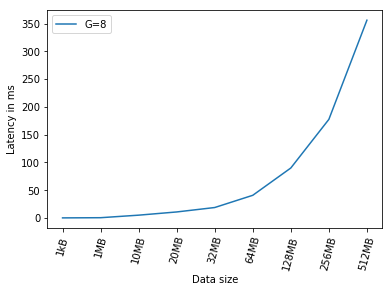

In [4]:
## Generation Size: 8 
## Actual On The fly - latency 

import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def data_size_in_bytes(data_size, mb=True):
    kb = 1024
    if mb:
        return data_size * kb * kb
    else:
        return data_size * kb

def  calulate_theorectical(gen, data_size, redundancy=0):
    symbols = data_size / gen
    return symbols * gen * (gen + redundancy)

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds
    return np.average(latency)

five_hundre_and_twelve_mb = 'results/encoder/thousand/1512428817_actual_on_the_fly_encoder_binary8_0_8_67108864'
two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512424410_actual_on_the_fly_encoder_binary8_0_8_33554432'
one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512422042_actual_on_the_fly_encoder_binary8_0_8_16777216'
sixty_four_mb = 'results/encoder/thousand/1512420706_actual_on_the_fly_encoder_binary8_0_8_8388608'
thirdy_two_mb = 'results/encoder/thousand/1512419890_actual_on_the_fly_encoder_binary8_0_8_4194304'
twenty_mb = 'results/encoder/thousand/1512419331_actual_on_the_fly_encoder_binary8_0_8_2621440'
ten_mb = 'results/encoder/thousand/1512418874_actual_on_the_fly_encoder_binary8_0_8_1310720'
one_mb = 'results/encoder/thousand/1512418495_actual_on_the_fly_encoder_binary8_0_8_131072'
one_kb = 'results/encoder/thousand/1512418184_actual_on_the_fly_encoder_binary8_0_8_128'

latencies = {}

latencies[0] = get_latency(one_kb)
latencies[1] = get_latency(one_mb)
latencies[2] = get_latency(ten_mb)
latencies[3] = get_latency(twenty_mb)
latencies[4] = get_latency(thirdy_two_mb)
latencies[5] = get_latency(sixty_four_mb)
latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
latencies[8] = get_latency(five_hundre_and_twelve_mb)

theory = {}

print calulate_theorectical(8, data_size_in_bytes(256))
theory[0] = calulate_theorectical(8, data_size_in_bytes(1, False)) 
theory[1] = calulate_theorectical(8, data_size_in_bytes(1))
theory[2] = calulate_theorectical(8, data_size_in_bytes(10))
theory[3] = calulate_theorectical(8, data_size_in_bytes(20))
theory[4] = calulate_theorectical(8, data_size_in_bytes(32))
theory[5] = calulate_theorectical(8, data_size_in_bytes(64))
theory[6] = calulate_theorectical(8, data_size_in_bytes(128))
theory[7] = calulate_theorectical(8, data_size_in_bytes(256))
theory[8] = calulate_theorectical(8, data_size_in_bytes(512))

print theory.values()

data_size = np.array(latencies.keys())
latency = np.array(latencies.values())
print(latency[8])
theory = np.array(theory.values())
pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(data_size, my_xticks,rotation=75)

plt.plot(data_size, latency)
#plt.plot(data_size, theory)
plt.legend(['G=8', 'G=8(T)'])
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/actual_on_the_fly_gen_8.eps')
plt.show()



2147483648
[8192, 8388608, 83886080, 167772160, 268435456, 536870912, 1073741824, 2147483648, 4294967296]


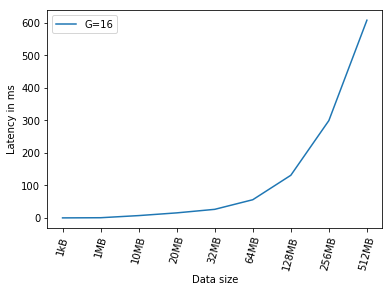

In [37]:
## Generation Size: 16 
## Actual On The fly - latency 

import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def data_size_in_bytes(data_size, mb=True):
    kb = 1024
    if mb:
        return data_size * kb * kb
    else:
        return data_size * kb

def  calulate_theorectical(gen, data_size, redundancy=0):
    symbols = data_size / gen
    return symbols * gen * (gen + redundancy)

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds
    return np.average(latency)

five_hundre_and_twelve_mb = 'results/encoder/thousand/1512440213_actual_on_the_fly_encoder_binary8_0_16_33554432'
two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512435529_actual_on_the_fly_encoder_binary8_0_16_16777216'
one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512433044_actual_on_the_fly_encoder_binary8_0_16_8388608'
sixty_four_mb = 'results/encoder/thousand/1512431668_actual_on_the_fly_encoder_binary8_0_16_4194304'
thirdy_two_mb = 'results/encoder/thousand/1512430840_actual_on_the_fly_encoder_binary8_0_16_2097152'
twenty_mb = 'results/encoder/thousand/1512430275_actual_on_the_fly_encoder_binary8_0_16_1310720'
ten_mb = 'results/encoder/thousand/1512429814_actual_on_the_fly_encoder_binary8_0_16_655360'
one_mb = 'results/encoder/thousand/1512429432_actual_on_the_fly_encoder_binary8_0_16_65536'
one_kb = 'results/encoder/thousand/1512429121_actual_on_the_fly_encoder_binary8_0_16_64'

latencies = {}

latencies[0] = get_latency(one_kb)
latencies[1] = get_latency(one_mb)
latencies[2] = get_latency(ten_mb)
latencies[3] = get_latency(twenty_mb)
latencies[4] = get_latency(thirdy_two_mb)
latencies[5] = get_latency(sixty_four_mb)
latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
latencies[8] = get_latency(five_hundre_and_twelve_mb)

theory = {}

print calulate_theorectical(8, data_size_in_bytes(256))
theory[0] = calulate_theorectical(8, data_size_in_bytes(1, False)) 
theory[1] = calulate_theorectical(8, data_size_in_bytes(1))
theory[2] = calulate_theorectical(8, data_size_in_bytes(10))
theory[3] = calulate_theorectical(8, data_size_in_bytes(20))
theory[4] = calulate_theorectical(8, data_size_in_bytes(32))
theory[5] = calulate_theorectical(8, data_size_in_bytes(64))
theory[6] = calulate_theorectical(8, data_size_in_bytes(128))
theory[7] = calulate_theorectical(8, data_size_in_bytes(256))
theory[8] = calulate_theorectical(8, data_size_in_bytes(512))

print theory.values()

data_size = np.array(latencies.keys())
latency = np.array(latencies.values())
theory = np.array(theory.values())
pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(data_size, my_xticks,rotation=75)

plt.plot(data_size, latency)
#plt.plot(data_size, theory)
plt.legend(['G=16', 'G=16(T)'])
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/actual_on_the_fly_gen_16.eps')
plt.show()



2147483648
[8192, 8388608, 83886080, 167772160, 268435456, 536870912, 1073741824, 2147483648, 4294967296]


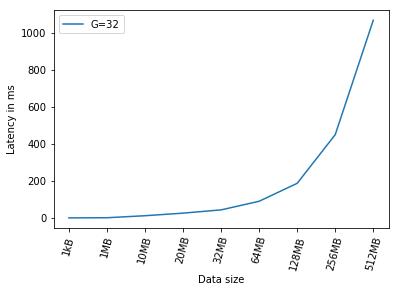

In [38]:
## Generation Size: 32 
## Actual On The fly - latency 

import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def data_size_in_bytes(data_size, mb=True):
    kb = 1024
    if mb:
        return data_size * kb * kb
    else:
        return data_size * kb

def  calulate_theorectical(gen, data_size, redundancy=0):
    symbols = data_size / gen
    return symbols * gen * (gen + redundancy)

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds
    return np.average(latency)

five_hundre_and_twelve_mb = 'results/encoder/thousand/1512452319_actual_on_the_fly_encoder_binary8_0_32_16777216'
two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512447186_actual_on_the_fly_encoder_binary8_0_32_8388608'
one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512444550_actual_on_the_fly_encoder_binary8_0_32_4194304'
sixty_four_mb = 'results/encoder/thousand/1512443124_actual_on_the_fly_encoder_binary8_0_32_2097152'
thirdy_two_mb = 'results/encoder/thousand/1512442266_actual_on_the_fly_encoder_binary8_0_32_1048576'
twenty_mb = 'results/encoder/thousand/1512441685_actual_on_the_fly_encoder_binary8_0_32_655360'
ten_mb = 'results/encoder/thousand/1512441215_actual_on_the_fly_encoder_binary8_0_32_327680'
one_mb = 'results/encoder/thousand/1512440829_actual_on_the_fly_encoder_binary8_0_32_32768'
one_kb = 'results/encoder/thousand/1512440517_actual_on_the_fly_encoder_binary8_0_32_32'

latencies = {}

latencies[0] = get_latency(one_kb)
latencies[1] = get_latency(one_mb)
latencies[2] = get_latency(ten_mb)
latencies[3] = get_latency(twenty_mb)
latencies[4] = get_latency(thirdy_two_mb)
latencies[5] = get_latency(sixty_four_mb)
latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
latencies[8] = get_latency(five_hundre_and_twelve_mb)

theory = {}

print calulate_theorectical(8, data_size_in_bytes(256))
theory[0] = calulate_theorectical(8, data_size_in_bytes(1, False)) 
theory[1] = calulate_theorectical(8, data_size_in_bytes(1))
theory[2] = calulate_theorectical(8, data_size_in_bytes(10))
theory[3] = calulate_theorectical(8, data_size_in_bytes(20))
theory[4] = calulate_theorectical(8, data_size_in_bytes(32))
theory[5] = calulate_theorectical(8, data_size_in_bytes(64))
theory[6] = calulate_theorectical(8, data_size_in_bytes(128))
theory[7] = calulate_theorectical(8, data_size_in_bytes(256))
theory[8] = calulate_theorectical(8, data_size_in_bytes(512))

print theory.values()

data_size = np.array(latencies.keys())
latency = np.array(latencies.values())
theory = np.array(theory.values())
pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(data_size, my_xticks,rotation=75)

plt.plot(data_size, latency)
#plt.plot(data_size, theory)
plt.legend(['G=32', 'G=32(T)'])
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/actual_on_the_fly_gen_32.eps')
plt.show()



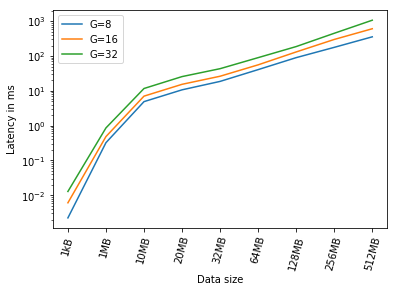

In [39]:
## Generation Size: 8,16,32 
## Actual On The Fly - latency comparison
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds 
    return np.average(latency)

def read_gen_eight():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512428817_actual_on_the_fly_encoder_binary8_0_8_67108864'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512424410_actual_on_the_fly_encoder_binary8_0_8_33554432'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512422042_actual_on_the_fly_encoder_binary8_0_8_16777216'
    sixty_four_mb = 'results/encoder/thousand/1512420706_actual_on_the_fly_encoder_binary8_0_8_8388608'
    thirdy_two_mb = 'results/encoder/thousand/1512419890_actual_on_the_fly_encoder_binary8_0_8_4194304'
    twenty_mb = 'results/encoder/thousand/1512419331_actual_on_the_fly_encoder_binary8_0_8_2621440'
    ten_mb = 'results/encoder/thousand/1512418874_actual_on_the_fly_encoder_binary8_0_8_1310720'
    one_mb = 'results/encoder/thousand/1512418495_actual_on_the_fly_encoder_binary8_0_8_131072'
    one_kb = 'results/encoder/thousand/1512418184_actual_on_the_fly_encoder_binary8_0_8_128'


    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def read_gen_sixteen():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512440213_actual_on_the_fly_encoder_binary8_0_16_33554432'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512435529_actual_on_the_fly_encoder_binary8_0_16_16777216'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512433044_actual_on_the_fly_encoder_binary8_0_16_8388608'
    sixty_four_mb = 'results/encoder/thousand/1512431668_actual_on_the_fly_encoder_binary8_0_16_4194304'
    thirdy_two_mb = 'results/encoder/thousand/1512430840_actual_on_the_fly_encoder_binary8_0_16_2097152'
    twenty_mb = 'results/encoder/thousand/1512430275_actual_on_the_fly_encoder_binary8_0_16_1310720'
    ten_mb = 'results/encoder/thousand/1512429814_actual_on_the_fly_encoder_binary8_0_16_655360'
    one_mb = 'results/encoder/thousand/1512429432_actual_on_the_fly_encoder_binary8_0_16_65536'
    one_kb = 'results/encoder/thousand/1512429121_actual_on_the_fly_encoder_binary8_0_16_64'
    
    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def read_gen_thirdy_two():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512452319_actual_on_the_fly_encoder_binary8_0_32_16777216'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512447186_actual_on_the_fly_encoder_binary8_0_32_8388608'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512444550_actual_on_the_fly_encoder_binary8_0_32_4194304'
    sixty_four_mb = 'results/encoder/thousand/1512443124_actual_on_the_fly_encoder_binary8_0_32_2097152'
    thirdy_two_mb = 'results/encoder/thousand/1512442266_actual_on_the_fly_encoder_binary8_0_32_1048576'
    twenty_mb = 'results/encoder/thousand/1512441685_actual_on_the_fly_encoder_binary8_0_32_655360'
    ten_mb = 'results/encoder/thousand/1512441215_actual_on_the_fly_encoder_binary8_0_32_327680'
    one_mb = 'results/encoder/thousand/1512440829_actual_on_the_fly_encoder_binary8_0_32_32768'
    one_kb = 'results/encoder/thousand/1512440517_actual_on_the_fly_encoder_binary8_0_32_32'
    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

eight_latencies = read_gen_eight()
eight_data_size = np.array(eight_latencies.keys())
eight_latency = np.array(eight_latencies.values())

sixteen_latencies = read_gen_sixteen()
sixteen_data_size = np.array(sixteen_latencies.keys())
sixteen_latency = np.array(sixteen_latencies.values())

thridy_two_latencies = read_gen_thirdy_two()
thridy_two_data_size = np.array(thridy_two_latencies.keys())
thridy_two_latency = np.array(thridy_two_latencies.values())


pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(eight_data_size, my_xticks, rotation=75)
plt.plot(eight_data_size, eight_latency)

plt.xticks(sixteen_data_size, my_xticks)
plt.plot(sixteen_data_size, sixteen_latency)

plt.xticks(thridy_two_data_size, my_xticks)
plt.plot(thridy_two_data_size, thridy_two_latency)

plt.yscale("log", nonposy="clip")
plt.legend(['G=8', 'G=16', 'G=32'])
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/actual_on_the_fly_gen_comparison.eps')
plt.show()

x: 0 and y: 0
8 1KiB diff: 1.1902635105
x: 1 and y: 1
8 1MiB diff: 1.52205306065
x: 2 and y: 2
8 10MiB diff: 1.3891052864
x: 3 and y: 3
8 20MiB diff: 1.34894082695
x: 4 and y: 4
8 32MiB diff: 1.30559880178
x: 5 and y: 5
8 64MiB diff: 1.44414974787
x: 6 and y: 6
8 64MiB diff: 1.50415695984
x: 7 and y: 7
8 128MiB diff: 1.50661119289
x: 8 and y: 8
8 256MiB diff: 1.5002575014
Average: 1.41234854314


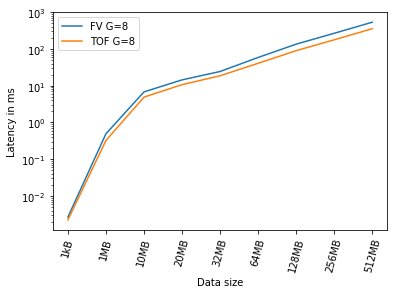

In [9]:
## DIFF TOF and FV for G=8
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds 
    return np.average(latency)

def fv_read_gen_eight():
    one_kb = 'results/encoder/thousand/1512452623_full_vector_encoder_binary8_0_8_128'
    one_mb = 'results/encoder/thousand/1512452934_full_vector_encoder_binary8_0_8_131072'
    ten_mb = 'results/encoder/thousand/1512453317_full_vector_encoder_binary8_0_8_1310720'
    twenty_mb = 'results/encoder/thousand/1512453778_full_vector_encoder_binary8_0_8_2621440'
    thirdy_two_mb = 'results/encoder/thousand/1512454344_full_vector_encoder_binary8_0_8_4194304'
    sixty_four_mb = 'results/encoder/thousand/1512455182_full_vector_encoder_binary8_0_8_8388608'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512456573_full_vector_encoder_binary8_0_8_16777216'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512459046_full_vector_encoder_binary8_0_8_33554432'
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512463692_full_vector_encoder_binary8_0_8_67108864'

    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def of_read_gen_eight():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512428817_actual_on_the_fly_encoder_binary8_0_8_67108864'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512424410_actual_on_the_fly_encoder_binary8_0_8_33554432'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512422042_actual_on_the_fly_encoder_binary8_0_8_16777216'
    sixty_four_mb = 'results/encoder/thousand/1512420706_actual_on_the_fly_encoder_binary8_0_8_8388608'
    thirdy_two_mb = 'results/encoder/thousand/1512419890_actual_on_the_fly_encoder_binary8_0_8_4194304'
    twenty_mb = 'results/encoder/thousand/1512419331_actual_on_the_fly_encoder_binary8_0_8_2621440'
    ten_mb = 'results/encoder/thousand/1512418874_actual_on_the_fly_encoder_binary8_0_8_1310720'
    one_mb = 'results/encoder/thousand/1512418495_actual_on_the_fly_encoder_binary8_0_8_131072'
    one_kb = 'results/encoder/thousand/1512418184_actual_on_the_fly_encoder_binary8_0_8_128'


    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def of_read_gen_sixteen():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512440213_actual_on_the_fly_encoder_binary8_0_16_33554432'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512435529_actual_on_the_fly_encoder_binary8_0_16_16777216'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512433044_actual_on_the_fly_encoder_binary8_0_16_8388608'
    sixty_four_mb = 'results/encoder/thousand/1512431668_actual_on_the_fly_encoder_binary8_0_16_4194304'
    thirdy_two_mb = 'results/encoder/thousand/1512430840_actual_on_the_fly_encoder_binary8_0_16_2097152'
    twenty_mb = 'results/encoder/thousand/1512430275_actual_on_the_fly_encoder_binary8_0_16_1310720'
    ten_mb = 'results/encoder/thousand/1512429814_actual_on_the_fly_encoder_binary8_0_16_655360'
    one_mb = 'results/encoder/thousand/1512429432_actual_on_the_fly_encoder_binary8_0_16_65536'
    one_kb = 'results/encoder/thousand/1512429121_actual_on_the_fly_encoder_binary8_0_16_64'    
    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies


def print_difference(gen, fv, of):
    i = 0
    ds = ''
    avg = 0.0
    for x,y in zip(fv,of):
        if i == 0:
            ds = '1KiB'
        elif i == 1:
            ds = '1MiB'
        elif i == 2:
            ds = '10MiB'            
        elif i == 3:
            ds = '20MiB'
        elif i == 4:
            ds = '32MiB'            
        elif i == 5:
            ds = '64MiB'   
        elif i == 6:
            ds = '64MiB'            
        elif i == 7:
            ds = '128MiB'            
        elif i == 8:
            ds = '256MiB'            
        elif i == 9:
            ds = '512MiB'

        res = fv[x]/float(of[y])
        avg = avg + res
        print('x: {} and y: {}'.format(x,y))
        print('{} {} diff: {}'.format(gen, ds, res))
        i = i + 1
    avg = avg / float(len(fv))
    print('Average: {}'.format(avg))
        
fv_eight_latencies = fv_read_gen_eight()
fv_eight_data_size = np.array(fv_eight_latencies.keys())
fv_eight_latency = np.array(fv_eight_latencies.values())


of_eight_latencies = of_read_gen_eight()
of_eight_data_size = np.array(of_eight_latencies.keys())
of_eight_latency = np.array(of_eight_latencies.values())

print_difference('8', fv_eight_latencies, of_eight_latencies)

pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']

plt.xticks(fv_eight_data_size, my_xticks, rotation=75)
plt.plot(fv_eight_data_size, fv_eight_latency, linestyle='-')

plt.xticks(of_eight_data_size, my_xticks)
plt.plot(of_eight_data_size, of_eight_latency, linestyle='-')

plt.yscale("log", nonposy="clip")
plt.legend(['FV G=8','TOF G=8'])
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/fv_aov_gen_8_comparison.eps')
plt.show()


8 1KiB diff: 0
8 1MiB diff: 1.0
8 10MiB diff: 1.0
8 20MiB diff: 1.0
8 32MiB diff: 1.0
8 64MiB diff: 1.0
8 64MiB diff: 1.0
8 128MiB diff: 1.0
8 256MiB diff: 1.0


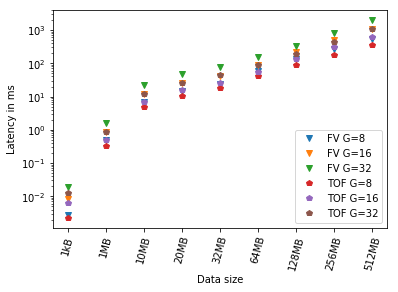

In [40]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds 
    return np.average(latency)

def fv_read_gen_eight():
    one_kb = 'results/encoder/thousand/1512452623_full_vector_encoder_binary8_0_8_128'
    one_mb = 'results/encoder/thousand/1512452934_full_vector_encoder_binary8_0_8_131072'
    ten_mb = 'results/encoder/thousand/1512453317_full_vector_encoder_binary8_0_8_1310720'
    twenty_mb = 'results/encoder/thousand/1512453778_full_vector_encoder_binary8_0_8_2621440'
    thirdy_two_mb = 'results/encoder/thousand/1512454344_full_vector_encoder_binary8_0_8_4194304'
    sixty_four_mb = 'results/encoder/thousand/1512455182_full_vector_encoder_binary8_0_8_8388608'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512456573_full_vector_encoder_binary8_0_8_16777216'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512459046_full_vector_encoder_binary8_0_8_33554432'
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512463692_full_vector_encoder_binary8_0_8_67108864'

    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def fv_read_gen_sixteen():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512475943_full_vector_encoder_binary8_0_16_33554432'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512470804_full_vector_encoder_binary8_0_16_16777216'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512468085_full_vector_encoder_binary8_0_16_8388608'
    sixty_four_mb = 'results/encoder/thousand/1512466613_full_vector_encoder_binary8_0_16_4194304'
    thirdy_two_mb = 'results/encoder/thousand/1512465749_full_vector_encoder_binary8_0_16_2097152'
    twenty_mb = 'results/encoder/thousand/1512465168_full_vector_encoder_binary8_0_16_1310720'
    ten_mb = 'results/encoder/thousand/1512464696_full_vector_encoder_binary8_0_16_655360'
    one_mb = 'results/encoder/thousand/1512464308_full_vector_encoder_binary8_0_16_65536'
    one_kb = 'results/encoder/thousand/1512463997_full_vector_encoder_binary8_0_16_64'
    
    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def fv_read_gen_thirdy_two():
    one_kb = 'results/encoder/thousand/1512476247_full_vector_encoder_binary8_0_32_32'
    one_mb = 'results/encoder/thousand/1512476560_full_vector_encoder_binary8_0_32_32768'
    ten_mb = 'results/encoder/thousand/1512476958_full_vector_encoder_binary8_0_32_327680'
    twenty_mb = 'results/encoder/thousand/1512477451_full_vector_encoder_binary8_0_32_655360'
    thirdy_two_mb = 'results/encoder/thousand/1512478066_full_vector_encoder_binary8_0_32_1048576'
    sixty_four_mb = 'results/encoder/thousand/1512478997_full_vector_encoder_binary8_0_32_2097152'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512480568_full_vector_encoder_binary8_0_32_4194304'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512483577_full_vector_encoder_binary8_0_32_8388608'
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512489653_full_vector_encoder_binary8_0_32_16777216'

    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def of_read_gen_eight():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512428817_actual_on_the_fly_encoder_binary8_0_8_67108864'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512424410_actual_on_the_fly_encoder_binary8_0_8_33554432'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512422042_actual_on_the_fly_encoder_binary8_0_8_16777216'
    sixty_four_mb = 'results/encoder/thousand/1512420706_actual_on_the_fly_encoder_binary8_0_8_8388608'
    thirdy_two_mb = 'results/encoder/thousand/1512419890_actual_on_the_fly_encoder_binary8_0_8_4194304'
    twenty_mb = 'results/encoder/thousand/1512419331_actual_on_the_fly_encoder_binary8_0_8_2621440'
    ten_mb = 'results/encoder/thousand/1512418874_actual_on_the_fly_encoder_binary8_0_8_1310720'
    one_mb = 'results/encoder/thousand/1512418495_actual_on_the_fly_encoder_binary8_0_8_131072'
    one_kb = 'results/encoder/thousand/1512418184_actual_on_the_fly_encoder_binary8_0_8_128'


    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def of_read_gen_sixteen():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512440213_actual_on_the_fly_encoder_binary8_0_16_33554432'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512435529_actual_on_the_fly_encoder_binary8_0_16_16777216'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512433044_actual_on_the_fly_encoder_binary8_0_16_8388608'
    sixty_four_mb = 'results/encoder/thousand/1512431668_actual_on_the_fly_encoder_binary8_0_16_4194304'
    thirdy_two_mb = 'results/encoder/thousand/1512430840_actual_on_the_fly_encoder_binary8_0_16_2097152'
    twenty_mb = 'results/encoder/thousand/1512430275_actual_on_the_fly_encoder_binary8_0_16_1310720'
    ten_mb = 'results/encoder/thousand/1512429814_actual_on_the_fly_encoder_binary8_0_16_655360'
    one_mb = 'results/encoder/thousand/1512429432_actual_on_the_fly_encoder_binary8_0_16_65536'
    one_kb = 'results/encoder/thousand/1512429121_actual_on_the_fly_encoder_binary8_0_16_64'    
    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def of_read_gen_thirdy_two():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512452319_actual_on_the_fly_encoder_binary8_0_32_16777216'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512447186_actual_on_the_fly_encoder_binary8_0_32_8388608'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512444550_actual_on_the_fly_encoder_binary8_0_32_4194304'
    sixty_four_mb = 'results/encoder/thousand/1512443124_actual_on_the_fly_encoder_binary8_0_32_2097152'
    thirdy_two_mb = 'results/encoder/thousand/1512442266_actual_on_the_fly_encoder_binary8_0_32_1048576'
    twenty_mb = 'results/encoder/thousand/1512441685_actual_on_the_fly_encoder_binary8_0_32_655360'
    ten_mb = 'results/encoder/thousand/1512441215_actual_on_the_fly_encoder_binary8_0_32_327680'
    one_mb = 'results/encoder/thousand/1512440829_actual_on_the_fly_encoder_binary8_0_32_32768'
    one_kb = 'results/encoder/thousand/1512440517_actual_on_the_fly_encoder_binary8_0_32_32'


    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies


def print_difference(gen, fv, of):
    i = 0
    ds = ''
    for x,y in zip(fv,of):
        if i == 0:
            ds = '1KiB'
        elif i == 1:
            ds = '1MiB'
        elif i == 2:
            ds = '10MiB'            
        elif i == 3:
            ds = '20MiB'
        elif i == 4:
            ds = '32MiB'            
        elif i == 5:
            ds = '64MiB'   
        elif i == 6:
            ds = '64MiB'            
        elif i == 7:
            ds = '128MiB'            
        elif i == 8:
            ds = '256MiB'            
        elif i == 9:
            ds = '512MiB'
        if y == 0:
            res = 0
        else:
            res = float(x)/float(y)
        print('{} {} diff: {}'.format(gen, ds, res))
        i = i + 1
        
fv_eight_latencies = fv_read_gen_eight()
fv_eight_data_size = np.array(fv_eight_latencies.keys())
fv_eight_latency = np.array(fv_eight_latencies.values())

fv_sixteen_latencies = fv_read_gen_sixteen()
fv_sixteen_data_size = np.array(fv_sixteen_latencies.keys())
fv_sixteen_latency = np.array(fv_sixteen_latencies.values())

fv_thridy_two_latencies = fv_read_gen_thirdy_two()
fv_thridy_two_data_size = np.array(fv_thridy_two_latencies.keys())
fv_thridy_two_latency = np.array(fv_thridy_two_latencies.values())

of_eight_latencies = of_read_gen_eight()
of_eight_data_size = np.array(of_eight_latencies.keys())
of_eight_latency = np.array(of_eight_latencies.values())

print_difference('8', fv_eight_latencies, of_eight_latencies)

of_sixteen_latencies = of_read_gen_sixteen()
of_sixteen_data_size = np.array(of_sixteen_latencies.keys())
of_sixteen_latency = np.array(of_sixteen_latencies.values())

of_thridy_two_latencies = of_read_gen_thirdy_two()
of_thridy_two_data_size = np.array(of_thridy_two_latencies.keys())
of_thridy_two_latency = np.array(of_thridy_two_latencies.values())


pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']

plt.xticks(fv_eight_data_size, my_xticks, rotation=75)
plt.plot(fv_eight_data_size, fv_eight_latency, marker='v', linestyle='')

plt.xticks(fv_sixteen_data_size, my_xticks)
plt.plot(fv_sixteen_data_size, fv_sixteen_latency, marker='v', linestyle='')

plt.xticks(fv_thridy_two_data_size, my_xticks)
plt.plot(fv_thridy_two_data_size, fv_thridy_two_latency, marker='v', linestyle='')

plt.xticks(of_eight_data_size, my_xticks)
plt.plot(of_eight_data_size, of_eight_latency, marker='p', linestyle='')

plt.xticks(of_sixteen_data_size, my_xticks)
plt.plot(of_sixteen_data_size, of_sixteen_latency, marker='p', linestyle='')

plt.xticks(of_thridy_two_data_size, my_xticks)
plt.plot(of_thridy_two_data_size, of_thridy_two_latency, marker='p', linestyle='')

plt.yscale("log", nonposy="clip")
plt.legend(['FV G=8', 'FV G=16', 'FV G=32', 'TOF G=8', 'TOF G=16', 'TOF G=32'])
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/fv_aov_comparison.eps')
plt.show()


2147483648
[8192, 8388608, 83886080, 167772160, 268435456, 536870912, 1073741824, 2147483648, 4294967296]


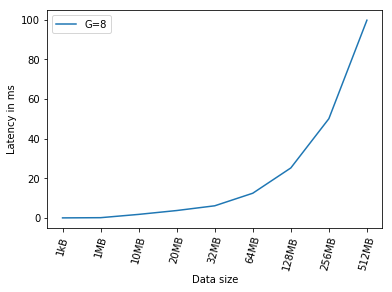

In [43]:
## Generation Size: 8 
## Perpetual - latency 

import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def data_size_in_bytes(data_size, mb=True):
    kb = 1024
    if mb:
        return data_size * kb * kb
    else:
        return data_size * kb

def  calulate_theorectical(gen, data_size, redundancy=0):
    symbols = data_size / gen
    return symbols * gen * (gen + redundancy)

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds
    return np.average(latency)

five_hundre_and_twelve_mb = 'results/encoder/thousand/1512538401_perpetual_encoder_binary8_0_8_67108864'
two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512534085_perpetual_encoder_binary8_0_8_33554432'
one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512531773_perpetual_encoder_binary8_0_8_16777216'
sixty_four_mb = 'results/encoder/thousand/1512530465_perpetual_encoder_binary8_0_8_8388608'
thirdy_two_mb = 'results/encoder/thousand/1512529659_perpetual_encoder_binary8_0_8_4194304'
twenty_mb = 'results/encoder/thousand/1512529105_perpetual_encoder_binary8_0_8_2621440'
ten_mb = 'results/encoder/thousand/1512528650_perpetual_encoder_binary8_0_8_1310720'
one_mb = 'results/encoder/thousand/1512528271_perpetual_encoder_binary8_0_8_131072'
one_kb = 'results/encoder/thousand/1512527960_perpetual_encoder_binary8_0_8_128'

latencies = {}

latencies[0] = get_latency(one_kb)
latencies[1] = get_latency(one_mb)
latencies[2] = get_latency(ten_mb)
latencies[3] = get_latency(twenty_mb)
latencies[4] = get_latency(thirdy_two_mb)
latencies[5] = get_latency(sixty_four_mb)
latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
latencies[8] = get_latency(five_hundre_and_twelve_mb)

theory = {}

print calulate_theorectical(8, data_size_in_bytes(256))
theory[0] = calulate_theorectical(8, data_size_in_bytes(1, False)) 
theory[1] = calulate_theorectical(8, data_size_in_bytes(1))
theory[2] = calulate_theorectical(8, data_size_in_bytes(10))
theory[3] = calulate_theorectical(8, data_size_in_bytes(20))
theory[4] = calulate_theorectical(8, data_size_in_bytes(32))
theory[5] = calulate_theorectical(8, data_size_in_bytes(64))
theory[6] = calulate_theorectical(8, data_size_in_bytes(128))
theory[7] = calulate_theorectical(8, data_size_in_bytes(256))
theory[8] = calulate_theorectical(8, data_size_in_bytes(512))

print theory.values()

data_size = np.array(latencies.keys())
latency = np.array(latencies.values())
theory = np.array(theory.values())
pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(data_size, my_xticks,rotation=75)

plt.plot(data_size, latency)
#plt.plot(data_size, theory)
plt.legend(['G=8', 'G=8(T)'])
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/perpetual_gen_8.eps')
plt.show()



2147483648
[8192, 8388608, 83886080, 167772160, 268435456, 536870912, 1073741824, 2147483648, 4294967296]


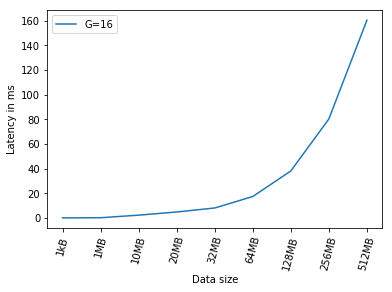

In [44]:
## Generation Size: 16 
## Perpetual - latency 

import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def data_size_in_bytes(data_size, mb=True):
    kb = 1024
    if mb:
        return data_size * kb * kb
    else:
        return data_size * kb

def  calulate_theorectical(gen, data_size, redundancy=0):
    symbols = data_size / gen
    return symbols * gen * (gen + redundancy)

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds
    return np.average(latency)

five_hundre_and_twelve_mb = 'results/encoder/thousand/1512549406_perpetual_encoder_binary8_0_16_33554432'
two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512544868_perpetual_encoder_binary8_0_16_16777216'
one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512542532_perpetual_encoder_binary8_0_16_8388608'
sixty_four_mb = 'results/encoder/thousand/1512541214_perpetual_encoder_binary8_0_16_4194304'
thirdy_two_mb = 'results/encoder/thousand/1512540406_perpetual_encoder_binary8_0_16_2097152'
twenty_mb = 'results/encoder/thousand/1512539851_perpetual_encoder_binary8_0_16_1310720'
ten_mb = 'results/encoder/thousand/1512539396_perpetual_encoder_binary8_0_16_655360'
one_mb = 'results/encoder/thousand/1512539017_perpetual_encoder_binary8_0_16_65536'
one_kb = 'results/encoder/thousand/1512538705_perpetual_encoder_binary8_0_16_64'

latencies = {}

latencies[0] = get_latency(one_kb)
latencies[1] = get_latency(one_mb)
latencies[2] = get_latency(ten_mb)
latencies[3] = get_latency(twenty_mb)
latencies[4] = get_latency(thirdy_two_mb)
latencies[5] = get_latency(sixty_four_mb)
latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
latencies[8] = get_latency(five_hundre_and_twelve_mb)

theory = {}

print calulate_theorectical(8, data_size_in_bytes(256))
theory[0] = calulate_theorectical(8, data_size_in_bytes(1, False)) 
theory[1] = calulate_theorectical(8, data_size_in_bytes(1))
theory[2] = calulate_theorectical(8, data_size_in_bytes(10))
theory[3] = calulate_theorectical(8, data_size_in_bytes(20))
theory[4] = calulate_theorectical(8, data_size_in_bytes(32))
theory[5] = calulate_theorectical(8, data_size_in_bytes(64))
theory[6] = calulate_theorectical(8, data_size_in_bytes(128))
theory[7] = calulate_theorectical(8, data_size_in_bytes(256))
theory[8] = calulate_theorectical(8, data_size_in_bytes(512))

print theory.values()

data_size = np.array(latencies.keys())
latency = np.array(latencies.values())
theory = np.array(theory.values())
pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(data_size, my_xticks,rotation=75)

plt.plot(data_size, latency)
#plt.plot(data_size, theory)
plt.legend(['G=16', 'G=16(T)'])
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/perpetual_gen_16.eps')
plt.show()



2147483648
[8192, 8388608, 83886080, 167772160, 268435456, 536870912, 1073741824, 2147483648, 4294967296]


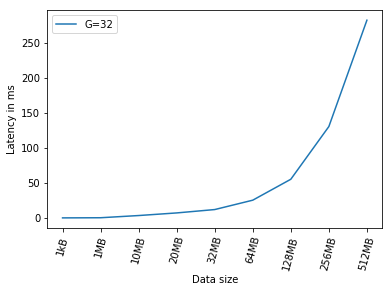

In [45]:
## Generation Size: 32 
## Perpetual - latency 

import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def data_size_in_bytes(data_size, mb=True):
    kb = 1024
    if mb:
        return data_size * kb * kb
    else:
        return data_size * kb

def  calulate_theorectical(gen, data_size, redundancy=0):
    symbols = data_size / gen
    return symbols * gen * (gen + redundancy)

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds
    return np.average(latency)

five_hundre_and_twelve_mb = 'results/encoder/thousand/1512560472_perpetual_encoder_binary8_0_32_16777216'
two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512555987_perpetual_encoder_binary8_0_32_8388608'
one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512553603_perpetual_encoder_binary8_0_32_4194304'
sixty_four_mb = 'results/encoder/thousand/1512552231_perpetual_encoder_binary8_0_32_2097152'
thirdy_two_mb = 'results/encoder/thousand/1512551417_perpetual_encoder_binary8_0_32_1048576'
twenty_mb = 'results/encoder/thousand/1512550859_perpetual_encoder_binary8_0_32_655360'
ten_mb = 'results/encoder/thousand/1512550401_perpetual_encoder_binary8_0_32_327680'
one_mb = 'results/encoder/thousand/1512550021_perpetual_encoder_binary8_0_32_32768'
one_kb = 'results/encoder/thousand/1512549710_perpetual_encoder_binary8_0_32_32'

latencies = {}

latencies[0] = get_latency(one_kb)
latencies[1] = get_latency(one_mb)
latencies[2] = get_latency(ten_mb)
latencies[3] = get_latency(twenty_mb)
latencies[4] = get_latency(thirdy_two_mb)
latencies[5] = get_latency(sixty_four_mb)
latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
latencies[8] = get_latency(five_hundre_and_twelve_mb)

theory = {}

print calulate_theorectical(8, data_size_in_bytes(256))
theory[0] = calulate_theorectical(8, data_size_in_bytes(1, False)) 
theory[1] = calulate_theorectical(8, data_size_in_bytes(1))
theory[2] = calulate_theorectical(8, data_size_in_bytes(10))
theory[3] = calulate_theorectical(8, data_size_in_bytes(20))
theory[4] = calulate_theorectical(8, data_size_in_bytes(32))
theory[5] = calulate_theorectical(8, data_size_in_bytes(64))
theory[6] = calulate_theorectical(8, data_size_in_bytes(128))
theory[7] = calulate_theorectical(8, data_size_in_bytes(256))
theory[8] = calulate_theorectical(8, data_size_in_bytes(512))

print theory.values()

data_size = np.array(latencies.keys())
latency = np.array(latencies.values())
theory = np.array(theory.values())
pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(data_size, my_xticks,rotation=75)

plt.plot(data_size, latency)
#plt.plot(data_size, theory)
plt.legend(['G=32', 'G=32(T)'])
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/perpetual_gen_32.eps')
plt.show()



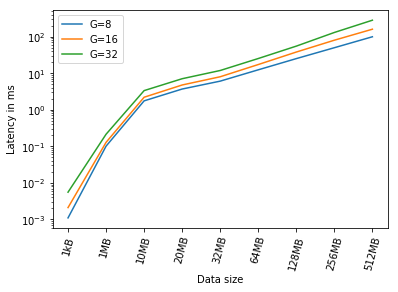

In [46]:
## Generation Size: 8,16,32 
## Actual On The Fly - latency comparison
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

def parseData(index, value):
    if index == 0 or index == 1 or index == 2 or index == 3 or index == 4:
        return int(value)
    else:
        return float(value)

def get_latency(file_name):
    file = open(file_name)
    data = []
    for line in file:
        temp = line.split(',')
        index = 0
        for item in temp: 
            temp[index] = parseData(index, item)
            index = index + 1
        data.append(temp)
    latency = [entry[6]/1000 for entry in data] # convert to milliseconds 
    return np.average(latency)

def read_gen_eight():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512538401_perpetual_encoder_binary8_0_8_67108864'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512534085_perpetual_encoder_binary8_0_8_33554432'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512531773_perpetual_encoder_binary8_0_8_16777216'
    sixty_four_mb = 'results/encoder/thousand/1512530465_perpetual_encoder_binary8_0_8_8388608'
    thirdy_two_mb = 'results/encoder/thousand/1512529659_perpetual_encoder_binary8_0_8_4194304'
    twenty_mb = 'results/encoder/thousand/1512529105_perpetual_encoder_binary8_0_8_2621440'
    ten_mb = 'results/encoder/thousand/1512528650_perpetual_encoder_binary8_0_8_1310720'
    one_mb = 'results/encoder/thousand/1512528271_perpetual_encoder_binary8_0_8_131072'
    one_kb = 'results/encoder/thousand/1512527960_perpetual_encoder_binary8_0_8_128'


    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def read_gen_sixteen():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512549406_perpetual_encoder_binary8_0_16_33554432'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512544868_perpetual_encoder_binary8_0_16_16777216'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512542532_perpetual_encoder_binary8_0_16_8388608'
    sixty_four_mb = 'results/encoder/thousand/1512541214_perpetual_encoder_binary8_0_16_4194304'
    thirdy_two_mb = 'results/encoder/thousand/1512540406_perpetual_encoder_binary8_0_16_2097152'
    twenty_mb = 'results/encoder/thousand/1512539851_perpetual_encoder_binary8_0_16_1310720'
    ten_mb = 'results/encoder/thousand/1512539396_perpetual_encoder_binary8_0_16_655360'
    one_mb = 'results/encoder/thousand/1512539017_perpetual_encoder_binary8_0_16_65536'
    one_kb = 'results/encoder/thousand/1512538705_perpetual_encoder_binary8_0_16_64'
    
    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

def read_gen_thirdy_two():
    five_hundre_and_twelve_mb = 'results/encoder/thousand/1512560472_perpetual_encoder_binary8_0_32_16777216'
    two_hundre_and_fifty_six_mb = 'results/encoder/thousand/1512555987_perpetual_encoder_binary8_0_32_8388608'
    one_hundre_and_twenty_eight_mb = 'results/encoder/thousand/1512553603_perpetual_encoder_binary8_0_32_4194304'
    sixty_four_mb = 'results/encoder/thousand/1512552231_perpetual_encoder_binary8_0_32_2097152'
    thirdy_two_mb = 'results/encoder/thousand/1512551417_perpetual_encoder_binary8_0_32_1048576'
    twenty_mb = 'results/encoder/thousand/1512550859_perpetual_encoder_binary8_0_32_655360'
    ten_mb = 'results/encoder/thousand/1512550401_perpetual_encoder_binary8_0_32_327680'
    one_mb = 'results/encoder/thousand/1512550021_perpetual_encoder_binary8_0_32_32768'
    one_kb = 'results/encoder/thousand/1512549710_perpetual_encoder_binary8_0_32_32'
    latencies = {}

    latencies[0] = get_latency(one_kb)
    latencies[1] = get_latency(one_mb)
    latencies[2] = get_latency(ten_mb)
    latencies[3] = get_latency(twenty_mb)
    latencies[4] = get_latency(thirdy_two_mb)
    latencies[5] = get_latency(sixty_four_mb)
    latencies[6] = get_latency(one_hundre_and_twenty_eight_mb)
    latencies[7] = get_latency(two_hundre_and_fifty_six_mb)
    latencies[8] = get_latency(five_hundre_and_twelve_mb)
    return latencies

eight_latencies = read_gen_eight()
eight_data_size = np.array(eight_latencies.keys())
eight_latency = np.array(eight_latencies.values())

sixteen_latencies = read_gen_sixteen()
sixteen_data_size = np.array(sixteen_latencies.keys())
sixteen_latency = np.array(sixteen_latencies.values())

thridy_two_latencies = read_gen_thirdy_two()
thridy_two_data_size = np.array(thridy_two_latencies.keys())
thridy_two_latency = np.array(thridy_two_latencies.values())


pd.DataFrame
fig = plt.figure()
my_xticks = ['1kB','1MB','10MB','20MB','32MB','64MB','128MB','256MB','512MB']
plt.xticks(data_size, my_xticks,rotation=75)
plt.plot(eight_data_size, eight_latency)

plt.xticks(sixteen_data_size, my_xticks)
plt.plot(sixteen_data_size, sixteen_latency)

plt.xticks(thridy_two_data_size, my_xticks)
plt.plot(thridy_two_data_size, thridy_two_latency)

plt.yscale("log", nonposy="clip")
plt.legend(['G=8', 'G=16', 'G=32'])
plt.ylabel('Latency in ms')
plt.xlabel('Data size')
fig.savefig('results/graphs/perpetual_gen_comparison.eps')
plt.show()